# Lab 3.02 - The Central Limit Theorem



In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
from fractions import Fraction
bakermiller = "#FF91AF"# Package Imports

## Exercise 1 - Cholesterol 

A health survey between 1988 and 1994 indicated that the mean cholesterol value for women between the age of 20 and 29 was 183 mg/dl, with a standard deviation equal to 36. We now take a random sample of 81 women.


In [3]:
mean_chol = 183
std_dev_chol = 36
sample_size_chol = 81
se_chol = std_dev_chol / np.sqrt(sample_size_chol)


1. Plot the probability distribution of the sample mean $\overline{x}$.
   


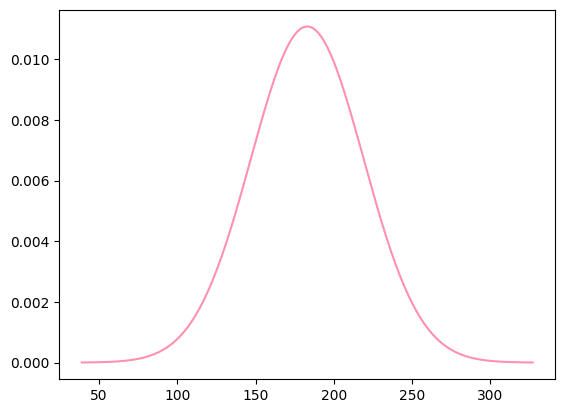

In [4]:
x = np.linspace(mean_chol - 4 * std_dev_chol, mean_chol + 4 * std_dev_chol, num=201)
y = stats.norm.pdf(x, mean_chol, std_dev_chol)
plt.plot(x, y, color=bakermiller)

2. What is the probability of the sample mean being $\overline{x} < 185$? (Answer ≈ 69,1%)
   

In [5]:
upper = 185

print(f"{stats.norm.cdf(upper, loc=mean_chol, scale=se_chol)*100:.1f}%")

69.1%


3. What is the probability of $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
   


In [6]:
lower = 175
upper = 185
print(f"{(stats.norm.cdf(upper, loc=mean_chol, scale=se_chol) - stats.norm.cdf(lower, loc=mean_chol, scale=se_chol))*100:.1f}%")

66.9%


4. What is the probability of $\overline{x} > 190$ (Answer ≈ 4,0%)

In [7]:
lower = 190
print(f"{(1 - stats.norm.cdf(lower, loc=mean_chol, scale=se_chol))*100:.1f}%")

4.0%


## Exercise 2

A random sample of 64 is drawn from a population with unknown distribution. However, the expectation and standard deviation of the population are known: $\mu = 20$ and $\sigma = 16$.


In [8]:
sample_size = 64
mu = 20
sigma = 16
sample_error = sigma / np.sqrt(sample_size)


1. Plot the probability distribution of the sample mean.
   


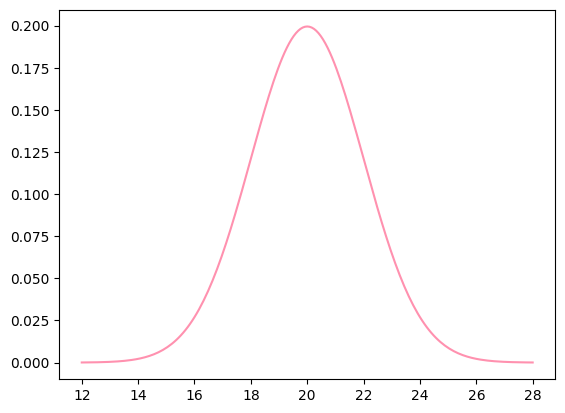

In [9]:
x = np.linspace(mu - 4 * sample_error, mu + 4 * sample_error, num=201)
y = stats.norm.pdf(x, mu, sample_error)
plt.plot(x, y, color=bakermiller)

2. Calculate the z-score for $\overline{x_1} = 15.5$  
   


In [10]:
z_1 = (15.5 - mu) / sample_error
z_1

np.float64(-2.25)

3. Calculate the z-score for $\overline{x_2} = 23$ 
   


In [11]:
z_2 = (23 - mu) / sample_error
z_2

np.float64(1.5)

4. Determine the probability that 16 < $\overline{x}$ < 22 (Answer ≈ 81.9%)

In [12]:
print(f"{(stats.norm.cdf(22, loc=mu, scale=sample_error) - stats.norm.cdf(16, loc=mu, scale=sample_error))*100:.1f}%")

81.9%


## Exercise 3

When students write in their bachelor thesis proposal that they want to conduct a survey, we usually try to dissuade them from doing so. With what you have learned about sampling and the central limit theorem, can you think of some reasons why we do this?

10.024187279121666
9.940619227094688


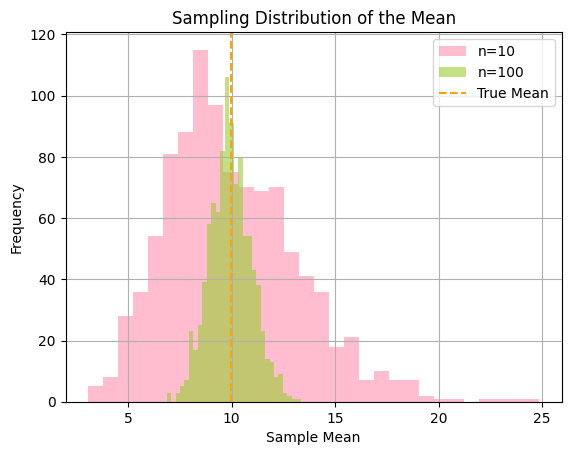

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated population (not normal!)
np.random.seed(42)
population = np.random.exponential(scale=10, size=100_000)

def sample_means(n, num_samples=1000):
    return [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(num_samples)]

# Small vs large sample sizes
means_small = sample_means(n=10)
means_large = sample_means(n=100)

print(np.mean(means_small))
print(np.mean(means_large))

# Plotting
plt.hist(means_small, bins=30, alpha=0.6, label='n=10', color=bakermiller)
plt.hist(means_large, bins=30, alpha=0.6, label='n=100', color="yellowgreen")
plt.axvline(np.mean(population), color='orange', linestyle='--', label='True Mean')
plt.title('Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Kost veel moeite om voldoende inputs te krijgen om een mooi bell-shaped curve te bekomen. Verder zijn er veel enquëte gerelateerde sample fouten waardoor we sample bias kunnen hebben.